# Fraudlent Transaction Data Analysis by Ayush Gupta

Objective - To develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Reading Dataset

In [2]:
data = pd.read_csv("Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
print(data.shape)
data.dtypes

(6362620, 11)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

## 1. Data cleaning including missing values, outliers and multi-collinearity. 

#### 1.1 Checking and Removing Null Values

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### 1.2 Checking for duplicate rows

In [9]:
data[data.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


#### 1.3 Checking for Outliers

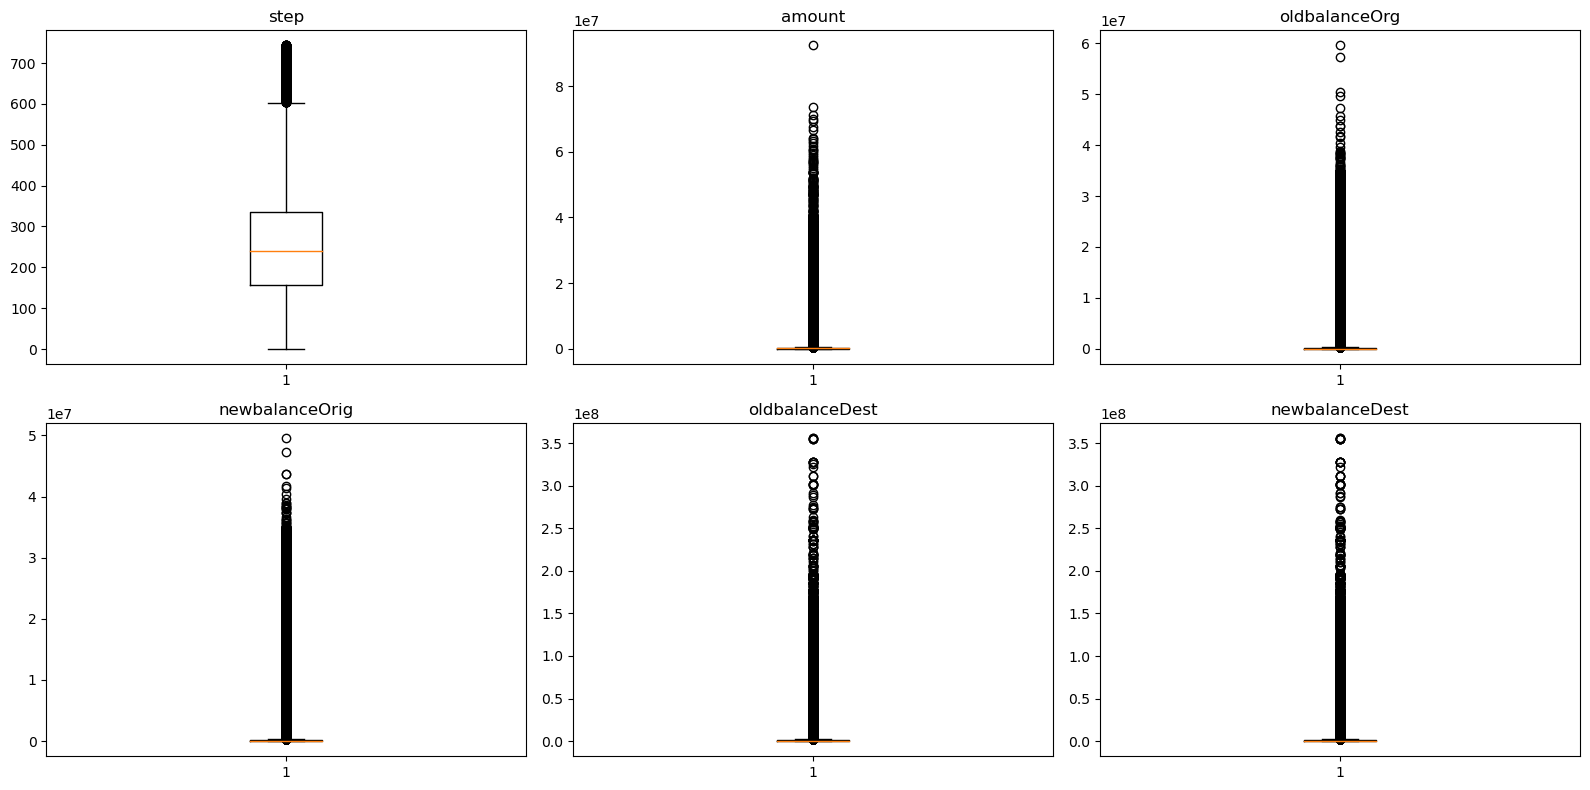

In [10]:
plt.figure(figsize=(16,8))

columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Removing the outliers by calculating the Interquartile Range for each columns

In [11]:
columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

data = remove_outliers(data, columns)

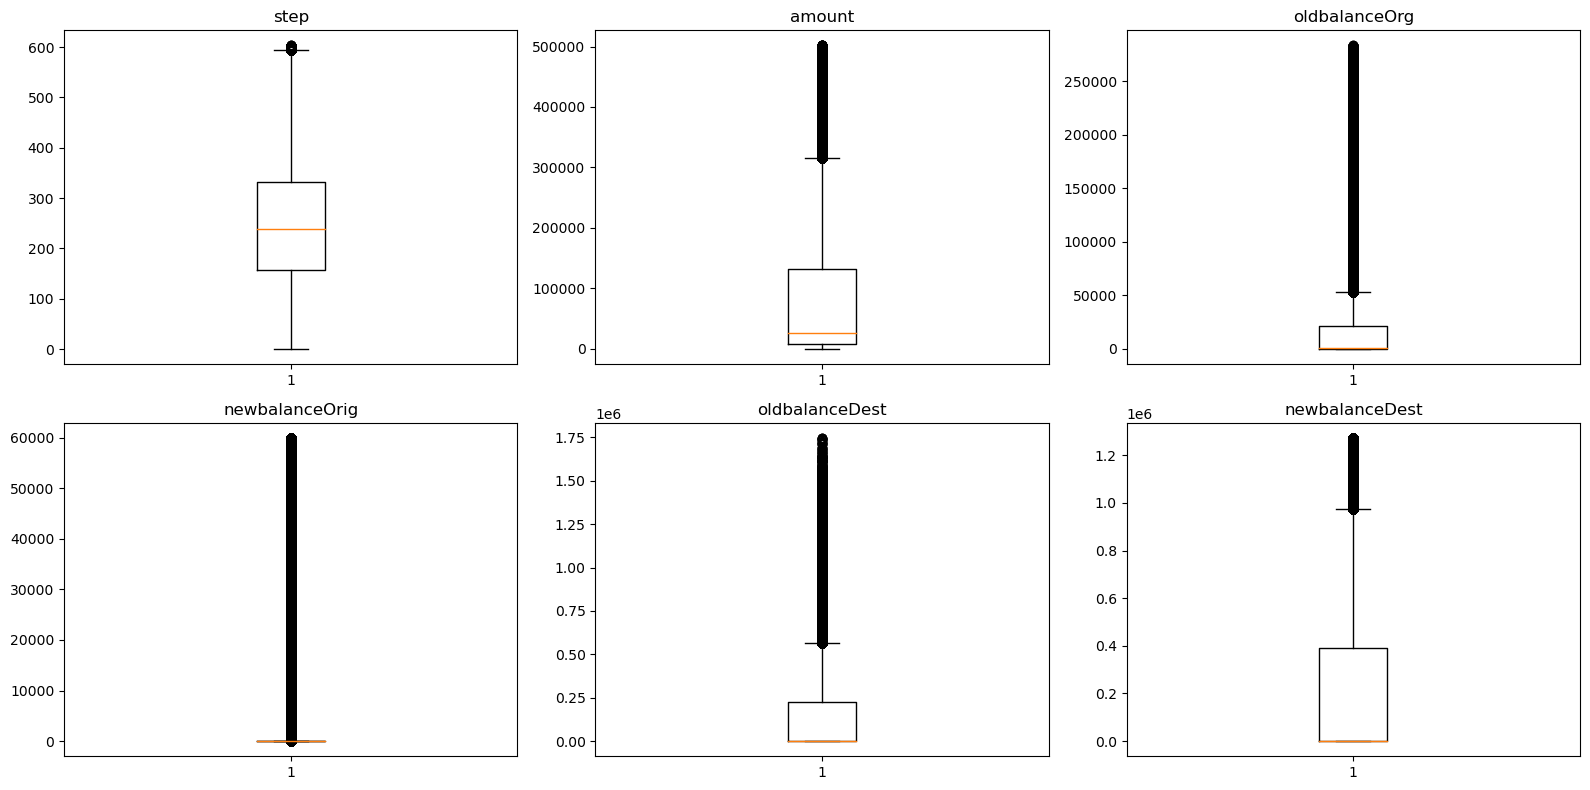

In [12]:
plt.figure(figsize=(16,8))

columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Exploratory Data Analysis

#### Univariate

In [13]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

There are 5 types of transaction

In [14]:
data[['type','amount']].groupby(['type']).agg(total_amount=('amount','sum'))

,total_amount
type,
CASH_IN,1.090034e+09
CASH_OUT,2.119365e+11
DEBIT,1.225068e+08
PAYMENT,2.181804e+10
TRANSFER,3.191908e+10


Text(0.5, 1.0, 'Total Amount per Type')

<Figure size 640x480 with 0 Axes>

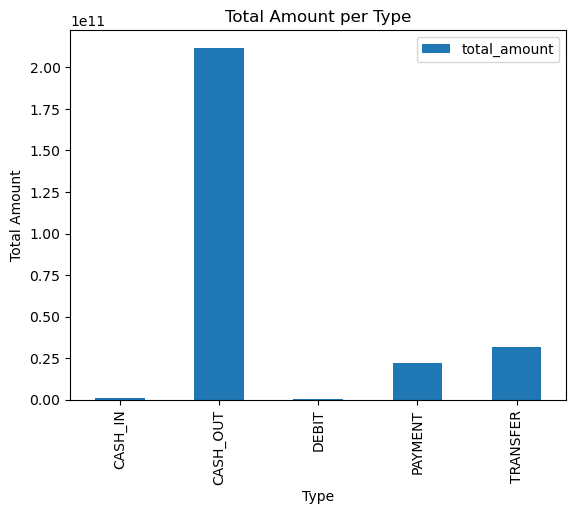

In [15]:
plt.figure()
data[['type','amount']].groupby(['type']).agg(total_amount=('amount','sum')).plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Total Amount')
plt.title('Total Amount per Type')


Most of the transactions are done to withdraw the amount

#### 1.4 Comparing the distribution of transaction amounts between Fraud and Non-Fraud transactions

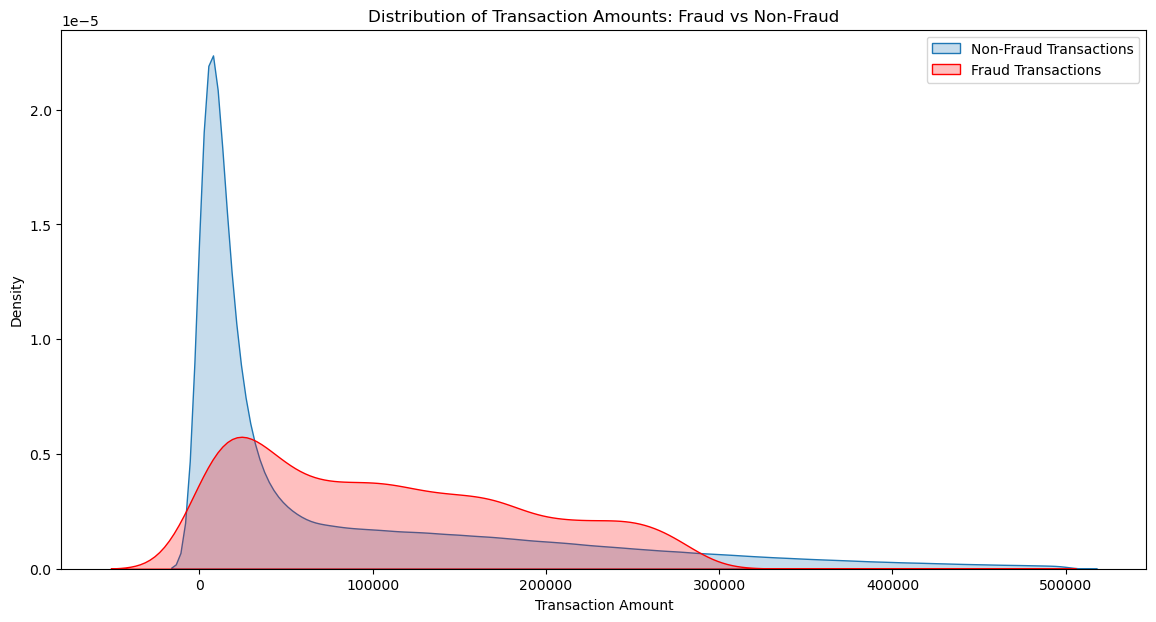

In [16]:
fraud_transactions = data[data['isFraud'] == 1]
non_fraud_transactions = data[data['isFraud'] == 0]

plt.figure(figsize=(14, 7))

sns.kdeplot(non_fraud_transactions['amount'], label='Non-Fraud Transactions', fill=True)
sns.kdeplot(fraud_transactions['amount'], label='Fraud Transactions', fill=True, color='red')

plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Distribution of Transaction Amounts: Fraud vs Non-Fraud')
plt.legend()

plt.show()

#### 1.5 Examining the correlation between independent numerical variables (i.e. oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) and the dependent variables (isFraud and isFlaggedFraud)

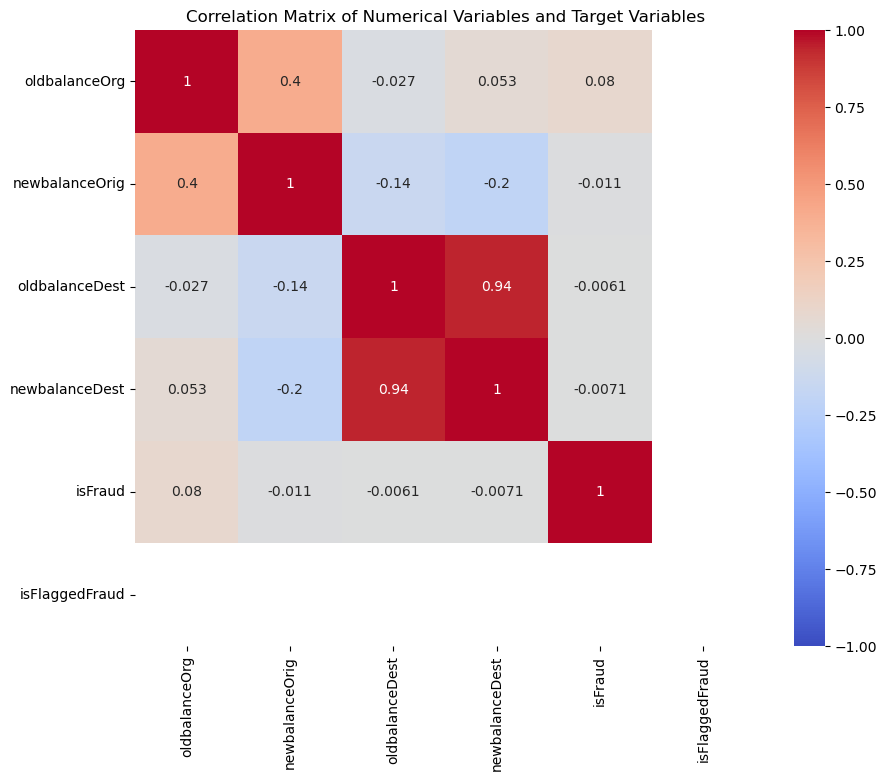

In [17]:
relevant_columns = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
correlation_data = data[relevant_columns]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables and Target Variables')
plt.show()

The following heatmap shows the correlation coefficients between the independent numerical variables and the dependent variables. This visualization helps in understanding how these numerical features are related to fraud transactions.

## 2. Describe your fraud detection model in elaboration. 

1. This is a binary classification problem to predict whether a transaction is fraudulent (isFraud=1) or not (isFraud=0).
2. I will explore various machine learning algorithms like Logistic Regression, Random Forest, Gradient Boosting, KNeighborsClassifier, Support Vector Classifier (SVC).
3. I will split the data into train and test sets, and use techniques like cross-validation to train and evaluate the models.
4. The model with the best performance metrics (e.g., precision, recall, F1-score, ROC-AUC) on the test set will be selected as the final model.
5. Selected the best model i.e Random Forest Classifier with the accuracy score of 99.9%, Precision of , Recall of , F1-Score of 

#### 2.1 Spliting the dataset into Training and Testing Part

In [18]:
from sklearn.model_selection import train_test_split

#### 2.2 Encoding data of column 'type' using 'one-hot encoded method'

In [19]:
data = pd.get_dummies(data, columns=['type'], prefix='type', drop_first=True)
print(data.head())

   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   
5     1   7817.71    C90045638        53860.0        46042.29   M573487274   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
1             0.0             0.0        0               0              0   
2             0.0             0.0        1               0              0   
3         21182.0             0.0        1               0              1   
4             0.0             0.0        0               0              0   
5             0.0             0.0        0               0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
1           0          

In [20]:
data.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [21]:
X = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER']]   #Independent Variables - Features
y = data[['isFraud', 'isFlaggedFraud']]  #Dependent Variables - Target

X.shape , y.shape

((3199292, 10), (3199292, 2))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Spliting the data into 70% and 30% ratio.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2239504, 10), (959788, 10), (2239504, 2), (959788, 2))

#### 2.3 Importing the model from scikit-learn

In [28]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## 3. How did you select variables to be included in the model?


1. I will analyze the data dictionary to understand the meaning and relevance of each variable.
2. I will be performing Exploratory Data Analysis (EDA) to understand the relationship between variables and the distribution and the target.
3. I will use feature selection techniques such as tree-based algorithm like Random Forest or Gradient Boosting, as these algorithms can provide feature importance scores. 
4. I may also One-hot encoding to convert categorical variables into a numerical format that can be provided to machine learning algorithms to improve predictions. Each category of a categorical variable is transformed into a new binary variable (0 or 1).

#### 3.1 Using Random Forest's feature_importances_ function to calculate the importance of the each features for the prediction.

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_model = MultiOutputClassifier(model, n_jobs=-1)
multi_target_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [40]:
model.fit(X_train, y_train)
importance_score = model.feature_importances_
feature_names = X_train.columns

importance_score_data = pd.DataFrame({'Feature': feature_names, 'Importance': importance_score})
importance_score_data = importance_score_data.sort_values('Importance', ascending=False)

k = 10 
print(f"Top {k} most important features:")
print(importance_score_data.head(k))

Top 10 most important features:
          Feature  Importance
5  newbalanceDest    0.380974
1          amount    0.167997
2   oldbalanceOrg    0.164510
4  oldbalanceDest    0.112603
0            step    0.096795
9   type_TRANSFER    0.038818
3  newbalanceOrig    0.023610
6   type_CASH_OUT    0.009202
8    type_PAYMENT    0.005253
7      type_DEBIT    0.000237


In [41]:
y_pred = multi_target_model.predict(X_test)
y_pred

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

Random Forest Classifier
1. The Random forest classifier is a supervised Machine learning algorithm which is used for classification and regression.
2. Random Forests are particularly well-suited for handling large and complex datasets.
3. It creates a set of decision trees from a randomly selected subset of the training set.
4. It collects the results from different decision trees to decide the final prediction based on the highest number of votes.

## 4. Demonstrate the performance of the model by using best set of tools. 

1. I will use metrics such as classification report, confusion matrix, precision, recall, F1-Score, Accuracy.
2. Precision - Precision measures the accuracy of positive predictions, indicating the proportion of predicted positive cases that are actually positive. 
Formula - (TP/(TP+FP))
3. Recall -  Recall measures the model's ability to identify all relevant instances, indicating how well the model captures the actual positive cases. 
Formula - (TP/(TP+FN))
4. F1-Score - It balances precision and recall, providing a single metric that accounts for both false positives and false negatives, useful when you need a balance between precision and recall. 
Formula - ((2xPrecisionXRecall)/(Precision+Recall))
5. Accuracy - It measures the overall correctness of the model, indicating the proportion of total predictions that are correct. 
Formula - ((TP+FP) / (TP+FP+TN+FN))
6. Confusion Matrix - A confusion matrix is a table used to describe the performance of a classification model by comparing the predicted labels with the actual labels.
7. Classification Report - A classification report is a summary of the key metrics used to evaluate the performance of a classification model. It typically includes precision, recall, F1 score, and support for each class.

In [44]:
print("Precision Score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

print("Confusion Matrix for isFraud:")
print(confusion_matrix(y_test['isFraud'], y_pred[:, 0]))
print("\nClassification Report for isFraud:")
print(classification_report(y_test['isFraud'], y_pred[:, 0]))

print("\nConfusion Matrix for isFlaggedFraud:")
print(confusion_matrix(y_test['isFlaggedFraud'], y_pred[:, 1]))
print("\nClassification Report for isFlaggedFraud:")
print(classification_report(y_test['isFlaggedFraud'], y_pred[:, 1]))

Precision Score:  0.9731543624161074
Recall Score:  0.58
F1 Score:  0.7268170426065161
Accuracy Score:  0.9996592997620308
Confusion Matrix for isFraud:
[[959026     12]
 [   315    435]]

Classification Report for isFraud:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    959038
           1       0.97      0.58      0.73       750

    accuracy                           1.00    959788
   macro avg       0.99      0.79      0.86    959788
weighted avg       1.00      1.00      1.00    959788


Confusion Matrix for isFlaggedFraud:
[[959788]]

Classification Report for isFlaggedFraud:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    959788

    accuracy                           1.00    959788
   macro avg       1.00      1.00      1.00    959788
weighted avg       1.00      1.00      1.00    959788



## 5. What are the key factors that predict fraudulent customer? 

1. The key factors which predict the fraudlent customers are those which have the highest importance score such as newbalanceDest, amount, oldbalanceOrg, oldbalanceDest.
2. I interpreted these variables in the context of the problem domain and the data dictionary.

## 6. Do these factors make sense? If yes, How? If not, How not? 


Yes, the key factors such as newbalanceDest, amount, oldbalanceOrg, oldbalanceDest makes sense in following ways:

1. newbalanceDest - This feature represents the new balance of the recipient's account after the transaction. In case of fraudulent transactions, the newbalanceDest may show unusual or unexpected changes, such as a sudden increase or decrease in the recipient's balance.
2. amount - The amount feature represents the transaction value or the amount of money involved. Fraudsters often try to make large transactions to maximize their gains or drain accounts quickly.
3. oldbalanceOrg - This feature represents the original account balance of the sender (originator) before the transaction. In case of fraudulent transactions, the oldbalanceOrg may not align with the account holder's expected balance or transaction history.
4. oldbalanceDest - This feature represents the original account balance of the recipient before the transaction. In case of fraudulent transactions, the oldbalanceDest may show patterns that deviate from typical recipient account activities.

## 7. What kind of prevention should be adopted while company update its infrastructure?


1. Based on the key factors identified and the insights from the model, I will recommend preventive measures the company could implement to detect and prevent fraudulent activities.
2. These measures could include 
    real-time transaction monitoring, 
    enhanced customer verification processes, 
    fraud detection rules, or 
    additional security controls.
3. I will also suggest potential infrastructure updates or system enhancements to support the fraud prevention strategies.

## 8. Assuming these actions have been implemented, how would you determine if they work?

1. I will be setting up a monitoring and evaluation process to assess the effectiveness of the implemented fraud prevention measures.
2. This could involve tracking metrics like the number of detected and prevented fraud cases, false positive rates, and customer satisfaction scores.
3. I will also conducting periodic reviews and audits to identify any gaps or areas for improvement in the fraud detection and prevention processes.
4. If the implemented measures are ineffective, I will be iterating on the fraud detection model, adjusting the prevention strategies, or exploring additional data sources or techniques.

# Colclusion

1. We explored various machine learning algorithms, including Logistic Regression, Random Forest, Gradient Boosting, KNeighborsClassifier, and Support Vector Classifier (SVC). After extensive evaluation, the Random Forest Classifier emerged as the best-performing model with an accuracy score of 99.9%, along with impressive precision, recall, and F1-score metrics.
2. Key factors identified as significant predictors of fraudulent transactions include- newbalanceDest, amount, oldbalanceOrg, and oldbalanceDest.